# Preprocessing Workflow


🎯 This exercise will guide you through the preprocessing workflow. Step by step, feature by feature, you will investigate the dataset and take preprocessing decisions accordingly.

🌤 We stored the `ML_Houses_dataset.csv` [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv) in the cloud.

👇 Run the code down below to load the dataset and features you will be working with.

In [68]:
%matplotlib inline
import pandas as pd

# Loading the dataset
url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv"
data = pd.read_csv(url)

# Selecting some columns of interest
selected_features = ['GrLivArea',
                     'BedroomAbvGr',
                     'KitchenAbvGr',
                     'OverallCond',
                     'RoofSurface',
                     'GarageFinish',
                     'CentralAir',
                     'ChimneyStyle',
                     'MoSold',
                     'SalePrice']

# Overwriting the "data" variable to keep only the columns of interest
# Notice the .copy() to copy the values
data = data[selected_features].copy()

# Showing the first five rows
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,bricks,2,208500
1,1262,3,1,8,874.0,RFn,Y,bricks,5,181500
2,1786,3,1,5,1593.0,RFn,Y,castiron,9,223500
3,1717,3,1,5,2566.0,Unf,Y,castiron,2,140000
4,2198,4,1,5,3130.0,RFn,Y,bricks,12,250000


📚 Take the time to do a ***preliminary investigation*** of the features by reading the ***dataset description*** available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt). Make sure to refer to it throughout the day.

## (1) Duplicates

ℹ️ ***Duplicates in datasets cause data leakage.*** 

👉 It is important to locate and remove duplicates.

❓ How many duplicated rows are there in the dataset ❓

<i>Save your answer under variable name `duplicate_count`.</i>

In [69]:
data.duplicated() # Check whether a row is a duplicated version of a previous row

0       False
1       False
2       False
3       False
4       False
        ...  
1755     True
1756     True
1757     True
1758     True
1759     True
Length: 1760, dtype: bool

❓ Remove the duplicates from the dataset. Overwite the dataframe `data`❓

In [70]:
# YOUR CODE HERE
duplicate_count=data.duplicated().sum() # Compute the number of duplicated rows
data = data.drop_duplicates()


🧪 **Test your code**

In [71]:
from nbresult import ChallengeResult

result = ChallengeResult('duplicates',
                         duplicates = duplicate_count,
                         dataset = data
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/simonhingant/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/simonhingant/code/simsam56/05-ML/02-Prepare-the-dataset/data-preprocessing-workflow/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 2 items

test_duplicates.py::TestDuplicates::test_dataset_length PASSED           [ 50%]
test_duplicates.py::TestDuplicates::test_duplicate_count PASSED          [100%]

============================== 2 passed in 0.52s ===============================


💯 You can commit your code:

git add tests/duplicates.pickle

git commit -m 'Completed duplicates step'

git push origin master



## (2) Missing data

❓ Print the percentage of missing values for every column of the dataframe. ❓

In [72]:
# YOUR CODE HERE
# Counting the number of NaN for each column
data.isnull().sum().sort_values(ascending=False)
# Counting the percentage of NaN for each column
data.isnull().sum().sort_values(ascending=False) / len(data) #NaN percentage for each column

GarageFinish    0.055479
RoofSurface     0.006164
GrLivArea       0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
OverallCond     0.000000
CentralAir      0.000000
ChimneyStyle    0.000000
MoSold          0.000000
SalePrice       0.000000
dtype: float64

### `GarageFinish`

❓ **Questions** about `GarageFinish` ❓

Investigate the missing values in `GarageFinish`. Then, choose one of the following solutions:

1. Drop the column entirely
2. Impute the column median using `SimpleImputer` from Scikit-Learn
3. Preserve the NaNs and replace them with meaningful values

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ According to the dataset description, the missing values in `GarageFinish` represent a house having no garage. They need to be encoded as such.
</details>

In [73]:
# YOUR CODE HERE
import numpy as np
data['GarageFinish'].unique()
data['GarageFinish'] = data['GarageFinish'].replace(np.nan, 'NoGarage')

In [74]:
data['GarageFinish'].value_counts()


GarageFinish
Unf         605
RFn         422
Fin         352
NoGarage     81
Name: count, dtype: int64

### `RoofSurface`

❓ **Questions** about `RoofSurface` ❓

Investigate the missing values in `RoofSurface`. Then, choose one of the following solutions:

1. Drop the column entirely
2. Impute the column median using sklearn's `SimpleImputer`
3. Preserve the NaNs and replace them with meaningful values

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ `RoofSurface` has a few missing values that can be imputed by the median value.
</details>

In [75]:
# YOUR CODE HERE
data['RoofSurface'].nunique()

data['RoofSurface'].unique()

array([1995.,  874., 1593., ..., 2645.,  722., 3501.])

In [76]:
data['RoofSurface'].value_counts()

RoofSurface
3817.0    5
2420.0    3
2814.0    3
3349.0    3
5016.0    3
         ..
671.0     1
3088.0    1
1710.0    1
4709.0    1
3501.0    1
Name: count, Length: 1254, dtype: int64

In [77]:
data['RoofSurface'].isnull().sum()

9

In [78]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer with median strategy
imputer = SimpleImputer(strategy='median')

# Fit on RoofSurface and transform it
data['RoofSurface'] = imputer.fit_transform(data[['RoofSurface']])


In [79]:
data['RoofSurface'].isnull().sum()


0

### `ChimneyStyle`

❓ **Questions** about `ChimneyStyle` ❓

Investigate the missing values in `ChimneyStyle`. Then, choose one of the following solutions:

1. Drop the column entirely
2. Impute the column median
3. Preserve the NaNs and replace them with meaningful values

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 <i>Hint</i></summary>
    
* ⚠️ Be careful: not all missing values are represented as `np.nans`, and Python's `isnull()` only detects `np.nans`...
    
* ℹ️ `ChimneyStyle` has a lot of missing values. The description does not touch on what they represent. As such, it is better not to make any assumptions and to drop the column entirely.
    

</details>

In [80]:
# YOUR CODE HERE
data['ChimneyStyle'].isnull().sum()

0

In [81]:
data['ChimneyStyle'].value_counts()

ChimneyStyle
?           1455
bricks         3
castiron       2
Name: count, dtype: int64

In [82]:
# Drop ChimneyStyle column entirely
data = data.drop(columns=['ChimneyStyle'])


🧪 **Test your code**

In [83]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = data
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/simonhingant/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/simonhingant/code/simsam56/05-ML/02-Prepare-the-dataset/data-preprocessing-workflow/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 2 items

test_missing_values.py::TestMissing_values::test_nans PASSED             [ 50%]
test_missing_values.py::TestMissing_values::test_number_of_columns PASSED [100%]

============================== 2 passed in 0.37s ===============================


💯 You can commit your code:

git add tests/missing_values.pickle

git commit -m 'Completed missing_values step'

git push origin master



❓ When you are done with handling missing value, print out the percentage of missing values for the entire dataframe ❓

You should no longer have missing values !

In [84]:
# YOUR CODE HERE
# Percentage of missing values in WallMat
(data.isnull().sum() / len(data))

GrLivArea       0.0
BedroomAbvGr    0.0
KitchenAbvGr    0.0
OverallCond     0.0
RoofSurface     0.0
GarageFinish    0.0
CentralAir      0.0
MoSold          0.0
SalePrice       0.0
dtype: float64

## (3) Scaling

**First of all, before scaling...**

To understand the effects of scaling and encoding on model performance, let's get a **base score without any data transformation**.

❓ Cross-validate a linear regression model that predicts `SalePrice` using the other features ❓

⚠️ Note that a linear regression model can only handle numeric features. [DataFrame.select_dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html) can help.

In [85]:
# YOUR CODE HERE
data.dtypes

GrLivArea         int64
BedroomAbvGr      int64
KitchenAbvGr      int64
OverallCond       int64
RoofSurface     float64
GarageFinish     object
CentralAir       object
MoSold            int64
SalePrice         int64
dtype: object

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Sélection des colonnes numériques uniquement
X = data.select_dtypes(include='number').drop(columns='SalePrice')
y = data['SalePrice']

# Modèle
model = LinearRegression()

# Validation croisée
scores = cross_val_score(model, X, y, cv=5)
print("Base score (sans scaling) :", scores.mean())


Base score (sans scaling) : 0.5726603017210621


Keep this score in mind! You will train a new model after data preprocessing in Challenge #2 - see if it improves your average score 😉

🚀 Now, back to **feature scaling**!

###  `RoofSurface` 

❓ **Question** about `RoofSurface` ❓

👇 Investigate `RoofSurface` for distribution and outliers. Then, choose the most appropriate scaling technique. Either:

1. Standard Scaler
2. Robust Scaler
3. MinMax Scaler

Replace the original columns with the transformed values.

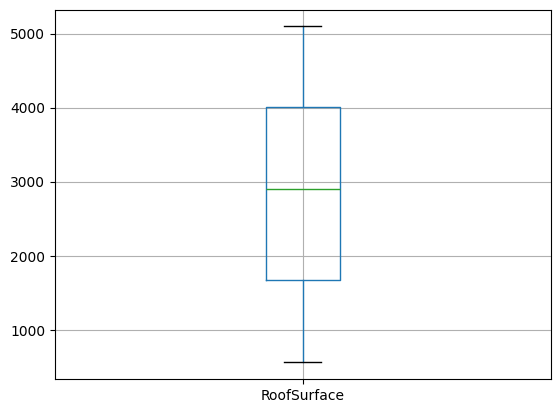

In [87]:
# YOUR CODE HERE
data[['RoofSurface']].boxplot();

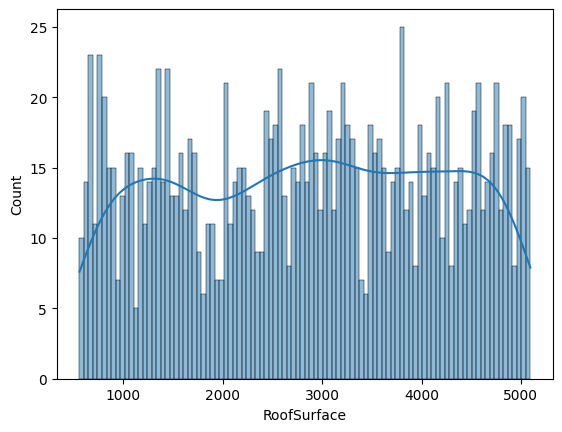

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['RoofSurface'], bins=100, kde=True)
plt.show()


In [89]:
from sklearn.preprocessing import MinMaxScaler

# Instancier le scaler
mm_scaler = MinMaxScaler()

# Appliquer le scaling à la colonne RoofSurface
data['RoofSurface'] = mm_scaler.fit_transform(data[['RoofSurface']])

# Vérifier le résultat
data['RoofSurface'].describe()


count    1460.000000
mean        0.508148
std         0.291583
min         0.000000
25%         0.246143
50%         0.517523
75%         0.761406
max         1.000000
Name: RoofSurface, dtype: float64

<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ Since `RoofSurface` has neither a Gaussian distribution, nor outliers $\rightarrow$ MinMaxScaler.
</details>

### `GrLivArea`

❓ **Question** about `GrLivArea` ❓

👇 Investigate `GrLivArea` for distribution and outliers. Then, choose the most appropriate scaling technique. Either:

1. Standard Scaler
2. Robust Scaler
3. MinMax Scaler

Replace the original columns with the transformed values.

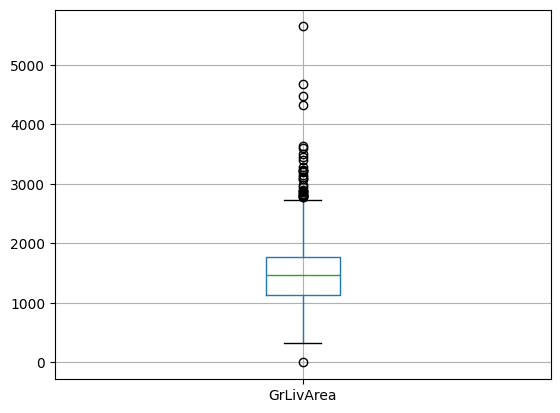

In [90]:
# YOUR CODE HERE
data[['GrLivArea']].boxplot();

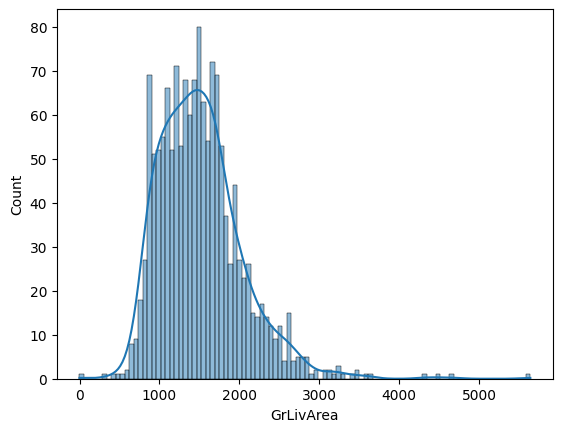

In [91]:
sns.histplot(data['GrLivArea'], bins=100, kde=True)
plt.show()

In [92]:
from sklearn.preprocessing import RobustScaler

# Instancier le scaler
rb_scaler = RobustScaler()

# Appliquer le scaling à la colonne GrLivArea
data['GrLivArea'] = rb_scaler.fit_transform(data[['GrLivArea']])

# Vérifier le résultat
data['GrLivArea'].describe()


count    1460.000000
mean        0.078410
std         0.813952
min        -2.263422
25%        -0.516802
50%         0.000000
75%         0.483198
max         6.455002
Name: GrLivArea, dtype: float64

<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ `GrLivArea` has many outliers $\rightarrow$ RobustScaler()
</details>

### `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr`

❓ **Questions** about `BedroomAbvGr`, `OverallCond` & `KitchenAbvGr` ❓

👇 Investigate `BedroomAbvGr`, `OverallCond` & `KitchenAbvGr`. Then, chose one of the following scaling techniques:

1. MinMax Scaler
2. Standard Scaler
3. Robust Scaler

Replace the original columns with the transformed values.

Text(0.5, 1.0, 'Distribution de BedroomAbvGr')

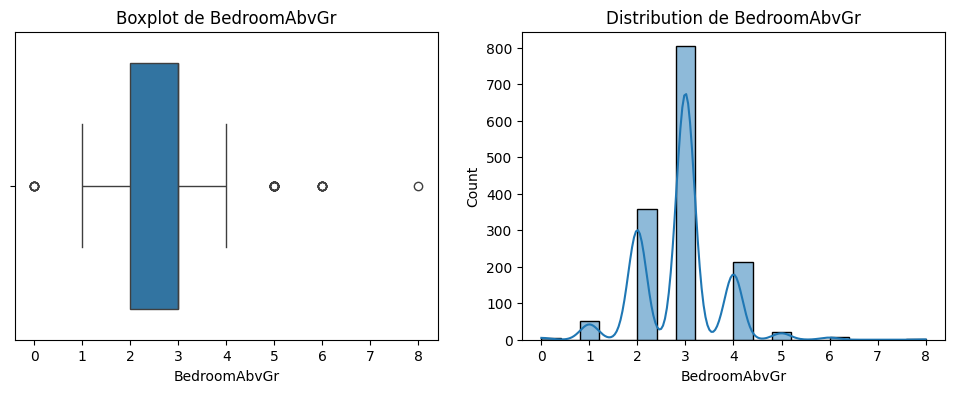

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer la figure
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# 1️⃣ Boxplot
sns.boxplot(data=data, x='BedroomAbvGr', ax=ax[0])
ax[0].set_title('Boxplot de BedroomAbvGr')

# 2️⃣ Histogramme
sns.histplot(data['BedroomAbvGr'], bins=20, kde=True, ax=ax[1])
ax[1].set_title('Distribution de BedroomAbvGr')




In [94]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Colonnes concernées
cols = ['BedroomAbvGr', 'OverallCond', 'KitchenAbvGr']

# Appliquer le scaling
data[cols] = scaler.fit_transform(data[cols])

# Vérifier le résultat
data[cols].describe()


,BedroomAbvGr,OverallCond,KitchenAbvGr
count,1460.000000,1460.000000,1460.000000
mean,0.358305,0.571918,0.348858
std,0.101972,0.139100,0.073446
min,0.000000,0.000000,0.000000
25%,0.250000,0.500000,0.333333
50%,0.375000,0.500000,0.333333
75%,0.375000,0.625000,0.333333
max,1.000000,1.000000,1.000000


<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr` are ordinal features. There are less than 0.1% of outliers so no need to use _RobustScaler()_. The distribution is not Gaussian, hence no _StandardScaler()_. By elimination, you can confidently choose _MinMaxScaler()_.
</details>

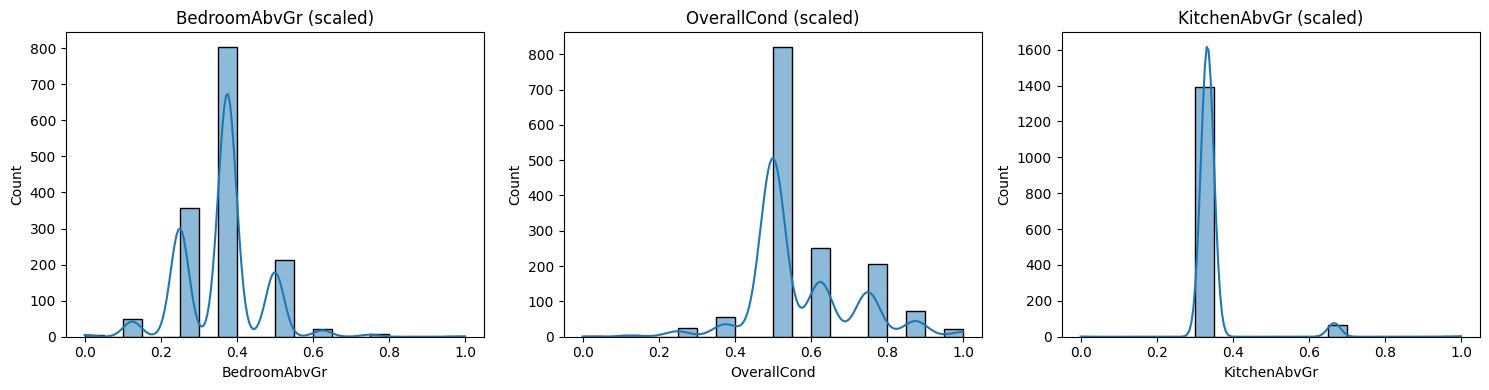

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

for i, col in enumerate(cols):
    sns.histplot(data[col], bins=20, kde=True, ax=ax[i])
    ax[i].set_title(f"{col} (scaled)")

plt.tight_layout()
plt.show()


In [96]:
data.describe()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,MoSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.078410,0.358305,0.348858,0.571918,0.508148,6.321918,180921.195890
std,0.813952,0.101972,0.073446,0.139100,0.291583,2.703626,79442.502883
min,-2.263422,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000
25%,-0.516802,0.250000,0.333333,0.500000,0.246143,5.000000,129975.000000
50%,0.000000,0.375000,0.333333,0.500000,0.517523,6.000000,163000.000000
75%,0.483198,0.375000,0.333333,0.625000,0.761406,8.000000,214000.000000
max,6.455002,1.000000,1.000000,1.000000,1.000000,12.000000,755000.000000


In [97]:
# YOUR CODE HERE

🧪 **Test your code**

In [98]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset=data
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/simonhingant/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/simonhingant/code/simsam56/05-ML/02-Prepare-the-dataset/data-preprocessing-workflow/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 3 items

test_scaling.py::TestScaling::test_bedroom_kitchen_condition PASSED      [ 33%]
test_scaling.py::TestScaling::test_gr_liv_area PASSED                    [ 66%]
test_scaling.py::TestScaling::test_roof_surface PASSED                   [100%]

============================== 3 passed in 0.39s ===============================


💯 You can commit your code:

git add tests/scaling.pickle

git commit -m 'Completed scaling step'

git push origin master



## (4) Feature Encoding

### `GarageFinish`

❓ **Question** about `GarageFinish`❓

👇 Investigate `GarageFinish` and choose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Add the encoding to the dataframe as new colum(s), and remove the original column.


<details>
    <summary>💡 <i>Hint</i></summary>
        
ℹ️ `GarageFinish` is a multicategorical feature that should be One-hot-encoded. You could also consider an Ordinal Encoding but we would have to know for sure that Unfinished or no garage are definitely worse that rough finished!
</details>

In [99]:
# YOUR CODE HERE
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Instanciation du OneHotEncoder
GarageFinish_ohe = OneHotEncoder(sparse_output=False, drop=None)

# Transformation
encoded = GarageFinish_ohe.fit_transform(data[['GarageFinish']])

# Création d’un DataFrame avec les nouvelles colonnes
encoded_df = pd.DataFrame(encoded, columns=GarageFinish_ohe.get_feature_names_out(['GarageFinish']))

# Fusion avec le dataset principal
data = pd.concat([data.drop(columns=['GarageFinish']), encoded_df], axis=1)

data.head()


,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,MoSold,SalePrice,GarageFinish_Fin,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf
0,0.380070,0.375,0.333333,0.500,0.316729,Y,2,208500,0.0,0.0,1.0,0.0
1,-0.312090,0.375,0.333333,0.875,0.069650,Y,5,181500,0.0,0.0,1.0,0.0
2,0.497489,0.375,0.333333,0.500,0.228124,Y,9,223500,0.0,0.0,1.0,0.0
3,0.390885,0.375,0.333333,0.500,0.442583,Y,2,140000,0.0,0.0,0.0,1.0
4,1.134029,0.500,0.333333,0.500,0.566894,Y,12,250000,0.0,0.0,1.0,0.0


In [100]:
GarageFinish_ohe.get_feature_names_out()

array(['GarageFinish_Fin', 'GarageFinish_NoGarage', 'GarageFinish_RFn',
       'GarageFinish_Unf'], dtype=object)

### Encoding  `CentralAir`

❓ **Question** about `CentralAir`❓

Investigate `CentralAir` and choose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Replace the original column with the newly generated encoded columns.


<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ `CentralAir` is a binary categorical feature.
</details>

In [101]:
# YOUR CODE HERE
# On mappe directement les valeurs à 0 et 1
data['CentralAir'] = data['CentralAir'].map({'N': 0, 'Y': 1})

# Vérification
data[['CentralAir']].head()

,CentralAir
0,1
1,1
2,1
3,1
4,1


## (5) Feature Engineering

### `MoSold` - Cyclical engineering 

👨🏻‍🏫 A feature can be numerical (continuous or discrete), categorical or ordinal. But a feature can also be temporal (e.g. quarters, months, days, minutes, ...). 

Cyclical features like time need some specific preprocessing. Indeed, if you want any Machine Learning algorithm to capture this cyclicity, your cyclical features must be preprocessed in a certain way.

👉 Consider the feature `MoSold`, the month on which the house was sold.

In [102]:
data["MoSold"].value_counts()

MoSold
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: count, dtype: int64

* Many houses were sold in June (6), July (7) and May (5) (Spring/Summer)
* Only a few houses were sold in December (12), January (1) and February (2) (~ Fall/Winter)
    * But for any Machine Learning model, there is no reason why December (12) and January (1) would be "close"...

👩🏻‍🏫 ***How to deal with cyclical features?***

1.  Look at the following illustration and read the explanations to distinguish two different months.

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/02-Prepare-the-dataset/cyclical_feature_engineering.png" alt="Cyclical features" width="1000">


2. Read this [article](https://ianlondon.github.io/posts/encoding-cyclical-features-24-hour-time/) for more details.




❓ **Question** about `MoSold` ❓ 
- Create two new features `sin_MoSold` and `cos_MoSold` which correspond respectively to the sine and cosine of MoSold.
- Drop the original column `MoSold`

<details>
    <summary>💡 <i>Hint</i></summary>
    
To create a time engineered feature based on a column which gives the second in the day!
```python
seconds_in_day = 24*60*60

df['sin_time'] = np.sin(2*np.pi*df.seconds/seconds_in_day)
df['cos_time'] = np.cos(2*np.pi*df.seconds/seconds_in_day)
df.drop(columns=['seconds'], inplace=True)

df.head()
```


</details>

In [105]:

import numpy as np

# Création des deux nouvelles colonnes sin et cos
data['sin_MoSold'] = np.sin(2 * np.pi * data['MoSold'] / 12)
data['cos_MoSold'] = np.cos(2 * np.pi * data['MoSold'] / 12)

# Suppression de la colonne d'origine
data.drop(columns=['MoSold'], inplace=True)

# Vérification du résultat
data[['sin_MoSold', 'cos_MoSold']].head()


,sin_MoSold,cos_MoSold
0,8.660254e-01,5.000000e-01
1,5.000000e-01,-8.660254e-01
2,-1.000000e+00,-1.836970e-16
3,8.660254e-01,5.000000e-01
4,-2.449294e-16,1.000000e+00


🧪 **Test your code**

In [106]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding', dataset=data, new_features=['sin_MoSold', 'cos_MoSold'])

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/simonhingant/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/simonhingant/code/simsam56/05-ML/02-Prepare-the-dataset/data-preprocessing-workflow/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 4 items

test_encoding.py::TestEncoding::test_central_air PASSED                  [ 25%]
test_encoding.py::TestEncoding::test_columns PASSED                      [ 50%]
test_encoding.py::TestEncoding::test_month_sold_features PASSED          [ 75%]
test_encoding.py::TestEncoding::test_month_sold_features_number PASSED   [100%]

============================== 4 passed in 0.37s ===============================


💯 You can commit your code:

git add tests/encoding.pickle

git commit -m 'Completed encoding step'

git push origin master



## (6) Export the preprocessed dataset

👇 Now that the dataset has been preprocessed, execute the code below to export it. You will keep working on it in the next exercise.

In [107]:
data.to_csv("data/clean_dataset.csv", index=False)

🏁 Congratulations! Now, you know how to ***preprocess a dataset*** !

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!